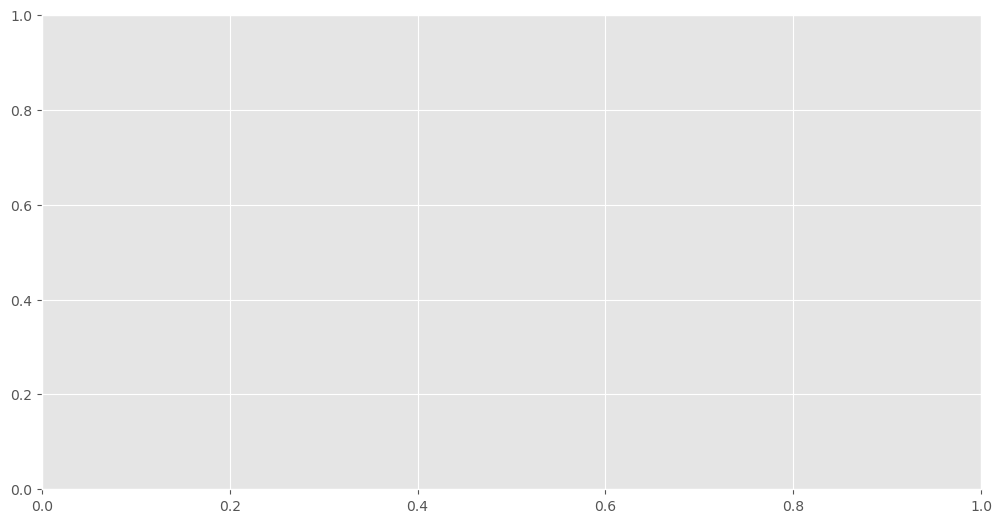

In [14]:
import tkinter as tk
from tkinter import ttk, messagebox, filedialog
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import ctypes
import os
import sys
import plotly.express as px
import pygetwindow as gw
from PIL import ImageTk, Image
import mplcursors
import joblib




def bring_to_foreground():
    windows = gw.getWindowsWithTitle('Dissertation Application - Chris Le')
    if windows:
        windows[0].activate()
        return True
    return False

if bring_to_foreground():
    exit()  

def resource_path(relative_path):
    try:
        base_path = sys._MEIPASS
    except Exception:
        base_path = os.path.abspath(".")

    return os.path.join(base_path, relative_path)

def read_metric_data(metric):
    file_name = metric_to_file[metric]
    file_path = resource_path(file_name)
    return pd.read_csv(file_path)


df = pd.read_csv(resource_path('final_df.csv'))

# Load the model
model = joblib.load('random_forest_model.pkl')


user32 = ctypes.windll.user32
screen_width = user32.GetSystemMetrics(0)
screen_height = user32.GetSystemMetrics(1)

root = tk.Tk()
root.iconbitmap(resource_path('allergen_wheat_icon.ico'))
root.title("Dissertation Application - Chris Le")


# Disable window resizing and maximize option
root.resizable(False, False)

# Load the background image
image_path = resource_path("OpeningFrame.jpg")
image = Image.open(image_path)
image_width, image_height = image.size
photo = ImageTk.PhotoImage(image)

# Set the window size
root.geometry(f"{image_width}x{image_height}")

# Create frames for the opening page and main page
opening_frame = tk.Frame(root, width=image_width, height=image_height)
main_frame = tk.Frame(root, width=screen_width, height=screen_height, bg='#31BF35')

# Add the background image to the opening frame
background_label = tk.Label(opening_frame, image=photo)
background_label.place(x=0, y=0, relwidth=1, relheight=1)


def show_frame(frame):
    if frame == main_frame:
        root.geometry(f"{screen_width}x{screen_height}")
        frame.place(x=0, y=0, width=screen_width, height=screen_height)
    frame.tkraise()

# Add starting button to the opening page
start_button = tk.Button(
    opening_frame,
    background='#4CAF50',  
    foreground='white',  
    activebackground='#45a049', 
    activeforeground='white', 
    highlightthickness=0,  
    width=20,  
    height=2,  
    border=0,  
    cursor='hand2',  
    text='Start',
    font=('Arial', 18, 'bold'),  
    command=lambda: show_frame(main_frame)
)

start_button.place(x=image_width // 2, y=image_height // 2, anchor="center")

# Place both frames on the root window
for frame in (opening_frame, main_frame):
    frame.place(x=0, y=0, width=image_width, height=image_height)
    
    
metric_to_file = {
        "Agricultural raw materials exports (% of merchandise exports)": 'agricultural_raw_materials_exports_subset.csv',
        "Agricultural raw materials imports (% of merchandise imports)": 'agricultural_raw_materials_imports_subset.csv',
        "Rural population (% of total population)": 'rural_population_percent.csv',
        "Rural population growth (annual %)": 'rural_population_growth_percent.csv',
        "Rural population": 'rural_population_total.csv',
        "Employment in agriculture (% of total employment) (modeled ILO estimate)": 'employment_agriculture_percent.csv',
        "Employment in agriculture, male (% of male employment) (modeled ILO estimate)": 'employment_agriculture_male_percent.csv',
        "Employment in agriculture, female (% of female employment) (modeled ILO estimate)": 'employment_agriculture_female_percent.csv',
        "Agriculture, forestry, and fishing, value added (% of GDP)": 'agriculture_value_added_percent_gdp.csv',
        "Agriculture, forestry, and fishing, value added (current US$)": 'agriculture_value_added_usd.csv',
        "Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)": 'annual_freshwater_withdrawals_agriculture_percent.csv',
        "Rural population living in areas where elevation is below 5 meters (% of total population)": 'rural_population_below_5m_elevation_percent.csv',
        "Agricultural nitrous oxide emissions (% of total)": 'agricultural_nitrous_oxide_emissions_percent.csv',
        "Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)": 'agricultural_nitrous_oxide_emissions_tons.csv',
        "Agricultural methane emissions (% of total)": 'agricultural_methane_emissions_percent.csv',
        "Agricultural methane emissions (thousand metric tons of CO2 equivalent)": 'agricultural_methane_emissions_tons.csv',
        "Access to electricity, rural (% of rural population)": 'access_to_electricity_rural_percent.csv',
        "Cereal yield (kg per hectare)": 'cereal_yield_kg_per_hectare.csv',
        "Surface area (sq. km)": 'surface_area_sq_km.csv',
        "Livestock production index (2014-2016 = 100)": 'livestock_production_index.csv',
        "Food production index (2014-2016 = 100)": 'food_production_index.csv',
        "Crop production index (2014-2016 = 100)": 'crop_production_index.csv',
        "Cereal production (metric tons)": 'cereal_production_metric_tons.csv',
        "Agricultural machinery, tractors per 100 sq. km of arable land": 'agricultural_machinery_tractors_per_100_sq_km.csv',
        "Rural land area (sq. km)": 'rural_land_area_sq_km.csv',
        "Land area (sq. km)": 'land_area_sq_km.csv',
        "Average precipitation in depth (mm per year)": 'average_precipitation_mm_per_year.csv',
        "Agricultural irrigated land (% of total agricultural land)": 'agricultural_irrigated_land_percent.csv',
        "Forest area (% of land area)": 'forest_area_percent.csv',
        "Forest area (sq. km)": 'forest_area_sq_km.csv',
        "Rural land area where elevation is below 5 meters (% of total land area)": 'rural_land_area_below_5m_elevation_percent.csv',
        "Rural land area where elevation is below 5 meters (sq. km)": 'rural_land_area_below_5m_elevation_sq_km.csv',
        "Permanent cropland (% of land area)": 'permanent_cropland_percent.csv',
        "Land under cereal production (hectares)": 'land_under_cereal_production_hectares.csv',
        "Arable land (% of land area)": 'arable_land_percent.csv',
        "Arable land (hectares per person)": 'arable_land_hectares_per_person.csv',
        "Arable land (hectares)": 'arable_land_total_hectares.csv',
        "Agricultural land (% of land area)": 'agricultural_land_percent.csv',
        "Agricultural land (sq. km)": 'agricultural_land_sq_km.csv',
        "Fertilizer consumption (kilograms per hectare of arable land)": 'fertilizer_consumption_kg_per_hectare.csv',
        "Fertilizer consumption (% of fertilizer production)": 'fertilizer_consumption_percent_production.csv',
        "Agricultural machinery, tractors": 'agricultural_machinery_tractors_total.csv'
    }

metric_to_y_label = {
    "Cereal yield (kg per hectare)": "Yield (kg per hectare)",
    "Agricultural raw materials exports (% of merchandise exports)": "Exports (% of merchandise exports)",
    "Agricultural raw materials imports (% of merchandise imports)": "Imports (% of merchandise imports)",
    "Arable land (% of land area)": "Arable land (% of land area)",
    "Arable land (hectares per person)": "Arable land (hectares per person)",
    "Arable land (hectares)": "Arable land (hectares)",
    "Agriculture, forestry, and fishing, value added (% of GDP)": "Value added (% of GDP)",
    "Agriculture, forestry, and fishing, value added (annual % growth)": "Value added (annual % growth)",
    "Agriculture, forestry, and fishing, value added (constant 2010 US$)": "Value added (constant 2010 US$)",
    "Agriculture, value added per worker (constant 2010 US$)": "Value added per worker (constant 2010 US$)",
    "Food production index (2004-2006 = 100)": "Food production index (2004-2006 = 100)",
    "Crop production index (2004-2006 = 100)": "Crop production index (2004-2006 = 100)",
    "Livestock production index (2004-2006 = 100)": "Livestock production index (2004-2006 = 100)",
    "Permanent cropland (% of land area)": "Permanent cropland (% of land area)",
    "Fertilizer consumption (kilograms per hectare of arable land)": "Fertilizer consumption (kg per hectare)",
    "Irrigated land (% of total agricultural land)": "Irrigated land (% of total agricultural land)",
    "Land under cereal production (hectares)": "Land under cereal production (hectares)",
    "Land under cereal production (metric tons)": "Land under cereal production (metric tons)",
    "Land area (sq. km)": "Land area (sq. km)",
    "Agricultural land (sq. km)": "Agricultural land (sq. km)",
    "Agricultural machinery, tractors per 100 sq. km of arable land": "Tractors per 100 sq. km of arable land",
    "Forest area (% of land area)": "Forest area (% of land area)",
    "Forest area (sq. km)": "Forest area (sq. km)",
    "Permanent cropland (hectares per person)": "Permanent cropland (hectares per person)",
    "Population density (people per sq. km of land area)": "Population density (people per sq. km)",
    "Rural population (% of total population)": "Rural population (% of total population)",
    "Rural population": "Rural population",
    "Rural population growth (annual %)": "Rural population growth (annual %)",
    "Urban population": "Urban population",
    "Urban population (% of total)": "Urban population (% of total)",
    "Urban population growth (annual %)": "Urban population growth (annual %)",
    "Food imports (% of merchandise imports)": "Food imports (% of merchandise imports)",
    "Food exports (% of merchandise exports)": "Food exports (% of merchandise exports)",
    "Net barter terms of trade index (2000 = 100)": "Net barter terms of trade index (2000 = 100)",
    "Agricultural land (% of land area)": "Agricultural land (% of land area)",
    "Agricultural machinery, tractors per 100 sq. km of arable land": "Tractors per 100 sq. km of arable land",
    "Agriculture, forestry, and fishing, value added (current US$)": "Value added (current US$)"
    
}

def export_to_csv(metric_to_file):
    selected_metric = metric_var.get()
    selected_country = country_var.get()

    if selected_metric in metric_to_file:
        selected_df = read_metric_data(selected_metric)
    else:
        messagebox.showerror("Error", "Metric not found")
        return

    country_data = selected_df[selected_df['Country Name'] == selected_country]

    if country_data.empty:
        years = pd.date_range(start='2000', end='2023', freq='Y').year
        graph_data = pd.DataFrame({'Year': years, 'Value': [0] * len(years)})
    else:
        country_data_transposed = country_data.transpose()
        country_data_transposed.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
        country_data_transposed.index = pd.to_datetime(country_data_transposed.index, errors='coerce')
        country_data_transposed.dropna(inplace=True)
        
        graph_data = country_data_transposed.reset_index()
        
        graph_data['Year'] = graph_data['index'].dt.year
        graph_data.drop(columns=['index'], inplace=True)
        graph_data.columns = ['Value', 'Year']
        graph_data = graph_data[['Year', 'Value']]
    
    if graph_data.empty or graph_data['Value'].isnull().all():
        years = pd.date_range(start='2000', end='2023', freq='Y').year
        graph_data = pd.DataFrame({'Year': years, 'Value': [0] * len(years)})

    # Get statistic values or use default value = 0
    statistics = {
        'Metric': [selected_metric],
        'Mean': [mean_value_label.cget("text") or '0'],
        'Median': [median_value_label.cget("text") or '0'],
        'Mode': [mode_value_label.cget("text") or '0'],
        'Min': [min_value_label.cget("text") or '0'],
        'Max': [max_value_label.cget("text") or '0'],
        'Q1': [q1_value_label.cget("text") or '0'],
        'Q2': [q2_value_label.cget("text") or '0'],
        'Q3': [q3_value_label.cget("text") or '0'],
        'Standard Deviation': [std_value_label.cget("text") or '0'],
        'Variance': [var_value_label.cget("text") or '0']
    }
    stats_df = pd.DataFrame(statistics)
    # Prompt for file location and name
    file_path = filedialog.asksaveasfilename(defaultextension='.csv', filetypes=[("CSV files", "*.csv")],
                                             title="Save CSV File As", initialfile="data.csv")

    if file_path:
        try:
            with open(file_path, 'w', newline='') as file:
                graph_data.to_csv(file, index=False)
                file.write("\n\n")  
                stats_df.to_csv(file, index=False)
            messagebox.showinfo("Export Success", f"Data exported successfully to {os.path.basename(file_path)}")
        except Exception as e:
            messagebox.showerror("Export Error", f"An error occurred while exporting the data: {str(e)}")
    else:
        messagebox.showwarning("Export Cancelled", "Export cancelled.")



def toggle_export_button(enable):
    export_button.config(state="normal" if enable else "disabled")
    

def toggle_export_image_button(enable):
    export_image_button.config(state="normal" if enable else "disabled")
    

def update_statistics(data):
    # Calculate statistical information
    mean_value = data.mean().values[0]
    median_value = data.median().values[0]
    mode_value = data.mode().values[0][0]
    min_value = data.min().values[0]
    max_value = data.max().values[0]
    std_value = data.std().values[0]
    var_value = data.var().values[0]
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)

    # Format the values
    mean_value_str = f'{mean_value:,.3f}'
    median_value_str = f'{median_value:,.3f}'
    mode_value_str = f'{mode_value:.3f}'
    min_value_str = f'{min_value:,.3f}'
    max_value_str = f'{max_value:,.3f}'
    std_value_str = f'{std_value:,.3f}'
    var_value_str = f'{var_value:,.3f}'
    q1_str = f'{q1:,.2f}'
    q2_str = f'{q2:,.2f}'
    q3_str = f'{q3:,.2f}'

    # Update label texts
    mean_value_label.config(text=f" {mean_value_str}")
    median_value_label.config(text=f" {median_value_str}")
    mode_value_label.config(text=f" {mode_value_str}")
    min_value_label.config(text=f" {min_value_str}")
    max_value_label.config(text=f" {max_value_str}")
    std_value_label.config(text=f" {std_value_str}")
    var_value_label.config(text=f" {var_value_str}")
    q1_value_label.config(text=f" {q1_str}")
    q2_value_label.config(text=f" {q2_str}")
    q3_value_label.config(text=f" {q3_str}")

    # Update the most recent year and value
    most_recent_row = data.dropna().iloc[-1]
    most_recent_year = most_recent_row.name.year
    most_recent_value = most_recent_row.values[0]
    recent_value_label.config(text=f"Most Recent Year: {most_recent_year}, Value: {most_recent_value:,.3f}")



# Add content to the main page
style = ttk.Style()
style.configure("TNotebook.Tab", padding=[10, 5], font=('Arial', 12, 'bold'))

notebook = ttk.Notebook(main_frame)
notebook.pack(fill="both", expand=True, padx=20, pady=30)

# Create frames for each tab
tab1 = ttk.Frame(notebook)
tab2 = ttk.Frame(notebook)

# Add tabs to the Notebook
notebook.add(tab1, text="Exploring Data Set")
notebook.add(tab2, text="Cereal Yield Prediction")

# Create left and right frames in Tab 1
left_frame = tk.Frame(tab1, width=screen_width//2, height=screen_height)
left_frame.pack(side="left", fill="both", expand=True)

right_frame = tk.Frame(tab1, width=300, height=300, bd=2, relief="solid")  
right_frame.pack(side="right", padx=50, pady=20)




# Add the most recent year and value label to the right frame
recent_value_label = tk.Label(right_frame, text="Most Recent Year:  , Value: ", justify="left", padx=10, pady=5)
recent_value_label.grid(row=0, column=0, columnspan=2, sticky='w')




# Define the export to image function
def export_graph_to_image():
    file_path = filedialog.asksaveasfilename(defaultextension='.png', filetypes=[("PNG files", "*.png"), ("All files", "*.*")])
    if file_path:
        try:
            fig.savefig(file_path)
            messagebox.showinfo("Export Success", f"Graph exported to {os.path.basename(file_path)}")
        except Exception as e:
            messagebox.showerror("Export Error", f"Error occurred: {str(e)}")
    else:
        messagebox.showwarning("Export Cancelled", "Export cancelled.")



# Options for the first dropdown
Options = [
    "Agricultural raw materials exports (% of merchandise exports)",
    "Agricultural raw materials imports (% of merchandise imports)",
    "Rural population (% of total population)",
    "Rural population growth (annual %)",
    "Rural population",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)",
    "Employment in agriculture, male (% of male employment) (modeled ILO estimate)",
    "Employment in agriculture, female (% of female employment) (modeled ILO estimate)",
    "Agriculture, forestry, and fishing, value added (% of GDP)",
    "Agriculture, forestry, and fishing, value added (current US$)",
    "Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",
    "Rural population living in areas where elevation is below 5 meters (% of total population)",
    "Agricultural nitrous oxide emissions (% of total)",
    "Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
    "Agricultural methane emissions (% of total)",
    "Agricultural methane emissions (thousand metric tons of CO2 equivalent)",
    "Access to electricity, rural (% of rural population)",
    "Cereal yield (kg per hectare)",
    "Surface area (sq. km)",
    "Livestock production index (2014-2016 = 100)",
    "Food production index (2014-2016 = 100)",
    "Crop production index (2014-2016 = 100)",
    "Cereal production (metric tons)",
    "Agricultural machinery, tractors per 100 sq. km of arable land",
    "Rural land area (sq. km)",
    "Land area (sq. km)",
    "Average precipitation in depth (mm per year)",
    "Agricultural irrigated land (% of total agricultural land)",
    "Forest area (% of land area)",
    "Forest area (sq. km)",
    "Rural land area where elevation is below 5 meters (% of total land area)",
    "Rural land area where elevation is below 5 meters (sq. km)",
    "Permanent cropland (% of land area)",
    "Land under cereal production (hectares)",
    "Arable land (% of land area)",
    "Arable land (hectares per person)",
    "Arable land (hectares)",
    "Agricultural land (% of land area)",
    "Agricultural land (sq. km)",
    "Fertilizer consumption (kilograms per hectare of arable land)",
    "Fertilizer consumption (% of fertilizer production)",
    "Agricultural machinery, tractors"
]

countries = df['Country Name'].unique().tolist()

# Create variables for dropdown menus
metric_var = tk.StringVar()
metric_var.set(Options[0])  

country_var = tk.StringVar()
country_var.set(countries[0]) 

# Create dropdown menus in left frame 
metric_menu = ttk.Combobox(left_frame, textvariable=metric_var, values=Options, width=75)
metric_menu.pack(pady=10)
metric_menu.current(0)

country_menu = ttk.Combobox(left_frame, textvariable=country_var, values=countries, width=75)
country_menu.pack(pady=10)
country_menu.current(0)



recent_value_label = tk.Label(right_frame, text="Most Recent Year: - , Value: -", justify="left", padx=10, pady=5, )
recent_value_label.grid(row=0, column=0, columnspan=2, sticky='w')



# Add statistical labels
mean_label = tk.Label(right_frame, text="Mean:", justify="left", padx=10, pady=5)
mean_label.grid(row=1, column=0, sticky='w')

mean_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
mean_value_label.grid(row=1, column=1, sticky='w')

median_label = tk.Label(right_frame, text="Median:", justify="left", padx=10, pady=5)
median_label.grid(row=2, column=0, sticky='w')

median_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
median_value_label.grid(row=2, column=1, sticky='w')

mode_label = tk.Label(right_frame, text="Mode:", justify="left", padx=10, pady=5)
mode_label.grid(row=3, column=0, sticky='w')

mode_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
mode_value_label.grid(row=3, column=1, sticky='w')

min_label = tk.Label(right_frame, text="Minimum:", justify="left", padx=10, pady=5)
min_label.grid(row=4, column=0, sticky='w')

min_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
min_value_label.grid(row=4, column=1, sticky='w')

max_label = tk.Label(right_frame, text="Maximum:", justify="left", padx=10, pady=5)
max_label.grid(row=5, column=0, sticky='w')

max_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
max_value_label.grid(row=5, column=1, sticky='w')

q1_label = tk.Label(right_frame, text="Q1:", justify="left", padx=10, pady=5)
q1_label.grid(row=6, column=0, sticky='w')

q1_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
q1_value_label.grid(row=6, column=1, sticky='w')

q2_label = tk.Label(right_frame, text="Q2:", justify="left", padx=10, pady=5)
q2_label.grid(row=7, column=0, sticky='w')

q2_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
q2_value_label.grid(row=7, column=1, sticky='w')

q3_label = tk.Label(right_frame, text="Q3:", justify="left", padx=10, pady=5)
q3_label.grid(row=8, column=0, sticky='w')

q3_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
q3_value_label.grid(row=8, column=1, sticky='w')

std_label = tk.Label(right_frame, text="Standard Deviation:", justify="left", padx=10, pady=5)
std_label.grid(row=9, column=0, sticky='w')

std_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
std_value_label.grid(row=9, column=1, sticky='w')

var_label = tk.Label(right_frame, text="Variance:", justify="left", padx=10, pady=5)
var_label.grid(row=10, column=0, sticky='w')

var_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
var_value_label.grid(row=10, column=1, sticky='w')

min_column_label = tk.Label(right_frame, text="Min Year:", justify="left", padx=10, pady=5 )
min_column_label.grid(row=11, column=0, sticky='w')

min_column_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
min_column_value_label.grid(row=11, column=1, sticky='w')

max_column_label = tk.Label(right_frame, text="Max Year:", justify="left", padx=10, pady=5)
max_column_label.grid(row=12, column=0, sticky='w')

max_column_value_label = tk.Label(right_frame, text="0", justify="left", padx=10, pady=5)
max_column_value_label.grid(row=12, column=1, sticky='w')

# Add the export to image button below the export to CSV button
export_image_button = tk.Button(right_frame, text="Export Graph to Image", command=export_graph_to_image, state="disabled")
export_image_button.grid(row=13, column=0, columnspan=2, pady=10)

# Add the export button below the statistical labels
export_button = tk.Button(right_frame, text="Export to CSV", command=lambda: export_to_csv(metric_to_file), state="disabled")
export_button.grid(row=14, column=0, columnspan=2, pady=10)




def update_column_names(data):
    if isinstance(data, pd.DataFrame):
        if data.empty:
            min_column_value_label.config(text="N/A")
            max_column_value_label.config(text="N/A")
            return

        if not pd.api.types.is_datetime64_any_dtype(data.index):
            try:
                data.index = pd.to_datetime(data.index)
            except Exception as e:
                min_column_value_label.config(text="N/A")
                max_column_value_label.config(text="N/A")
                return
            
        if pd.api.types.is_integer_dtype(data.columns):
            data.columns = ['Value']
            
        if 'Value' not in data.columns:
            min_column_value_label.config(text="N/A")
            max_column_value_label.config(text="N/A")
            return
        
        data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

        if data['Value'].isnull().any():
            min_column_value_label.config(text="N/A")
            max_column_value_label.config(text="N/A")
            return


        min_value_index = data['Value'].idxmin()


        max_value_index = data['Value'].idxmax()

        # Get the years from the datetime index
        min_value_year = min_value_index.year
        max_value_year = max_value_index.year

        # Update year labell
        min_column_value_label.config(text=str(min_value_year))
        max_column_value_label.config(text=str(max_value_year))

    elif isinstance(data, pd.Series):
        min_value_index = data.idxmin()
        max_value_index = data.idxmax()
        min_value_year = min_value_index.year
        max_value_year = max_value_index.year
        min_column_value_label.config(text=str(min_value_year))
        max_column_value_label.config(text=str(max_value_year))

    else:
        min_column_value_label.config(text="N/A")
        max_column_value_label.config(text="N/A")
        
        
def update_graph():
    selected_metric = metric_var.get()
    selected_country = country_var.get()

    plt.close()

    if selected_metric in metric_to_file:
        selected_df = pd.read_csv(metric_to_file[selected_metric])
    else:
        messagebox.showerror("Error", "Metric not found")
        return

    # Filter the dataframe for wanted country
    country_data = selected_df[selected_df['Country Name'] == selected_country]

    if country_data.empty:
        result_label.config(text=f"No data available for {selected_country} for {selected_metric}. Please use the search box above to select a different country or region.")
        toggle_export_button(False)
        toggle_export_image_button(False)
        min_column_value_label.config(text="N/A")
        max_column_value_label.config(text="N/A")
        return

    # Check for null values
    if country_data.isnull().values.all():
        result_label.config(text=f"No data is available for the selected country.")
        toggle_export_button(False)
        toggle_export_image_button(False)
        min_column_value_label.config(text="N/A")
        max_column_value_label.config(text="N/A")
        return

    # Transpose the DataFrame
    country_data_transposed = country_data.transpose()
    country_data_transposed.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
    country_data_transposed.index = pd.to_datetime(country_data_transposed.index, errors='coerce')
    country_data_transposed.dropna(inplace=True)

    # Clear the current graph
    ax.clear()

    if country_data_transposed.empty:
        messagebox.showerror("Error", "No data is available for the specified locations. Please use the search box above to select a different country or region.")
        return

    # Plot the graph
    plt.style.use('ggplot')
    line, = ax.plot(country_data_transposed.index, country_data_transposed.values, color='blue', marker='.', mfc='k', markeredgecolor='yellow', markersize=15)
    ax.set_title(f"{selected_metric} for {selected_country}", fontsize=10)
    ax.set_xlabel('Year')
    y_label = metric_to_y_label.get(selected_metric, 'Value')
    ax.set_ylabel(y_label)

    # Add hover functionality
    cursor = mplcursors.cursor(line, hover=mplcursors.HoverMode.Transient)
    @cursor.connect("add")
    def show_value_on_hover(hover):
        x, y = hover.target
        value = y
        
        hover_text = f"value: {value:.2f}"
        
        hover.annotation.set_text(hover_text)
        hover.annotation.get_bbox_patch().set(fc="white", alpha=0.8)

    # Update the canvas
    canvas_agg.draw()

    # Update the statistical data
    update_statistics(country_data_transposed)

    # Call update_column_names function
    update_column_names(country_data_transposed)

    # Enable the "Export to CSV" and "Export Graph to Image" buttons after updating the graph
    toggle_export_button(True)
    toggle_export_image_button(True)
    
    
    
update_button = tk.Button(left_frame, text="Update Graph", command=update_graph)
update_button.pack(pady=10)

# Create a placeholder for the graph in left frame
fig, ax = plt.subplots()
canvas_agg = FigureCanvasTkAgg(fig, master=left_frame)
canvas_widget = canvas_agg.get_tk_widget()
canvas_widget.pack(pady=10)

# Clear the initial graph to ensure it is empty
ax.clear()
canvas_agg.draw()


# Pack widgets correctly
update_button.pack(side="top")
metric_menu.pack(side="top")
country_menu.pack(side="top")
canvas_widget.pack(fill="both", expand=True)



# Create a canvas and scrollbar for Tab 2
canvas = tk.Canvas(tab2)
scrollbar = ttk.Scrollbar(tab2, orient="vertical", command=canvas.yview)
scrollable_frame = ttk.Frame(canvas)

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(
        scrollregion=canvas.bbox("all")
    )
)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scrollbar.set)

# Add an explanation at the top
explanation = ttk.Label(scrollable_frame, text="Enter the following information to predict cereal yield. All fields are required.", font=('Arial', 11), wraplength=500)
explanation.grid(row=0, column=0, columnspan=2, pady=20, padx=10)

# Create 3 groups
land_variables = [('Arable land', '% of land area'), ('Land under cereal production', 'hectares'), ('Forest area', 'sq. km'), ('Agricultural land.', 'sq. km'), ('Agricultural land', '% of land area'), ('Land area', 'sq. km'),  ('Arable land.', 'hectares') ]

environmental_variables = [('Average precipitation in depth', 'mm per year'), ('Agricultural methane emissions', 'thousand metric tons of CO2 equivalent')]

other_variables = [('Rural population', 'people'), ('Agriculture, forestry, and fishing, value added', 'current US$')]

# Create a group of entries
def create_entry_group(frame, variables, start_row):
    entries = {}
    for i, (var, unit) in enumerate(variables):
        label = ttk.Label(frame, text=f"{var} ({unit}):", font=('Arial', 10))
        label.grid(row=start_row+i, column=0, sticky='w', padx=10, pady=5)
        
        entry = ttk.Entry(frame, width=30)
        entry.grid(row=start_row+i, column=1, padx=10, pady=5)
        
        entries[var] = entry
    return entries, start_row + len(variables)


land_entries, row = create_entry_group(scrollable_frame, land_variables, 1)
ttk.Label(scrollable_frame, text="Environmental Factors", font=('Arial', 11, 'bold')).grid(row=row, column=0, columnspan=2, pady=10)
env_entries, row = create_entry_group(scrollable_frame, environmental_variables, row+1)
ttk.Label(scrollable_frame, text="Other Factors", font=('Arial', 11, 'bold')).grid(row=row, column=0, columnspan=2, pady=10)
other_entries, row = create_entry_group(scrollable_frame, other_variables, row+1)

entries = {**land_entries, **env_entries, **other_entries}

# Add 2 buttons 
button_frame = ttk.Frame(scrollable_frame)
button_frame.grid(row=row, column=0, columnspan=2, pady=20)


# Add the function to the button
predict_button = ttk.Button(button_frame, text="Predict Cereal Yield", command=lambda: predict_yield(entries))
predict_button.pack(side="left", padx=10)

reset_button = ttk.Button(button_frame, text="Reset Fields", command=lambda: reset_fields(entries))
reset_button.pack(side="left", padx=10)


result_label = ttk.Label(scrollable_frame, text="", font=('Arial', 12, 'bold'))
result_label.grid(row=row+1, column=0, columnspan=2, pady=10)


canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")

# Validate input
def validate_input(entries):
    non_numeric = []
    empty_fields = []
    for var, entry in entries.items():
        value = entry.get().strip()
        if not value:
            empty_fields.append(var)
        elif not value.replace('.', '').isdigit():
            non_numeric.append(var)
    return non_numeric, empty_fields

MAE = 551689.7434524591  
def predict_yield(entries):
    non_numeric, empty_fields = validate_input(entries)
    if empty_fields:
        error_message = "Please fill in all fields."
        messagebox.showerror("Input Error", error_message)
    elif non_numeric:
        error_message = "The following variables have non-numeric input:\n" + "\n".join(non_numeric)
        messagebox.showerror("Input Error", error_message)
    else:
        try:
            # Collect input values from user
            agriculture_value_added = float(entries['Agriculture, forestry, and fishing, value added'].get().strip())
            agricultural_land = float(entries['Agricultural land.'].get().strip())
            forest_area = float(entries['Forest area'].get().strip())
            rural_population = float(entries['Rural population'].get().strip())
            agricultural_land_percent = float(entries['Agricultural land'].get().strip())
            arable_land_percent = float(entries['Arable land'].get().strip())
            methane_emissions = float(entries['Agricultural methane emissions'].get().strip())
            land_under_cereal = float(entries['Land under cereal production'].get().strip())
            avg_precipitation = float(entries['Average precipitation in depth'].get().strip())

            # Calculate features engineering var
            land_area = float(entries['Land area'].get().strip())  
            arable_land_hectares = float(entries['Arable land.'].get().strip())  

            arable_land_ratio = arable_land_hectares / land_area
            forest_ratio = forest_area / land_area
            agricultural_land_ratio = agricultural_land / land_area
            rural_population_density = rural_population / land_area

            input_values = [
                agriculture_value_added,
                agricultural_land,
                forest_area,
                rural_population,
                agricultural_land_percent,
                arable_land_percent,
                methane_emissions,
                land_under_cereal,
                avg_precipitation,
                arable_land_ratio,
                forest_ratio,
                agricultural_land_ratio,
                rural_population_density
            ]
            
            input_array = np.array([input_values])

            # Make prediction
            prediction = model.predict(input_array)[0]

            # Calculate prediction range using MAE
            lower_bound = prediction - MAE
            upper_bound = prediction + MAE

            # Update result label with prediction and range
            result_label.config(
                text=f"Prediction: The estimated cereal yield is {prediction:.2f} metric tons.\n"
                     f"The value could be in the range between {lower_bound:.2f} and {upper_bound:.2f} metric tons.",
                foreground="green"
            )
        except KeyError as e:
            messagebox.showerror("Error", f"Missing input for variable: {e}")
        except ValueError as e:
            messagebox.showerror("Error", f"Invalid input value: {e}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred during prediction: {e}")


# Function to reset all fields
def reset_fields(entries):
    for var, entry in entries.items():
        entry.delete(0, tk.END)
    result_label.config(text="")

# Function to handle window close event
def on_closing():
    if messagebox.askyesno("Quit", "Do you want to close the application?"):
        root.destroy()

# Bind the on_closing function to the window close event
root.protocol("WM_DELETE_WINDOW", on_closing)

# Show the opening frame initially
show_frame(opening_frame)


root.mainloop()

In [15]:
!jupyter nbconvert --to script "app.ipynb"

[NbConvertApp] Converting notebook app.ipynb to script
[NbConvertApp] Writing 36056 bytes to app.py
